Lattice plasmon resonances in thin films
========

Must change title eventually

Supporting information - couple dipole approximation (CDA)
--------

Abstract
--------

Optical resonances in films containing plasmonic nanoparticles in two-dimensional ordered lattices show interesting dependence on the thickness of the containing film. Here we use the coupled dipole approximation to show that these thickness-dependent resonances are the result of plasmonic coupling to reflections at the air-film interface. 

# Initialize analysis

## Initialize computational/python framework

In [1]:
%run "header.py"

Loading import modules ...
  ... math, cmath (local)
  ... os, sys, types, importlib
  ... time, datetime
  ... ipyparallel as ipp
  ... numpy as np
  ... scipy as sp
      scipy.special (local, for Bessel functions)
      scipy.interpolate as interpolate
      scipy.signal as signal
  ... matplotlib
      matplotlib.pyplot as plt
      matplotlib.cm as cm
      matplotlib.pylab as pylab
  ... peakutils
Defining fundamental constants ...
  ... Avogadro's number: 'AvogadroN'
  ... speed of light: 'cumfs','cnmfs'
  ... Planck's constant: 'heVfs','hbareVfs'
  ... electron rest mass: 'eMass0eVnmfs'
  ... permittivity of free space: 'eps0enmV'
Loading analysis codes ... 
  ... refractive index functions loaded:
       Au, Ag, SiO2, ITO, ZnO, H2O, 
       ethanol, CS2, benzene, toluene, 
       chloroform, methanol, butanol, 
       propanol
  ... Mie functions loaded
  ... CDA functions loaded
  ... lattice generation functions loaded:
       hexagonal 2D
Ready player one.


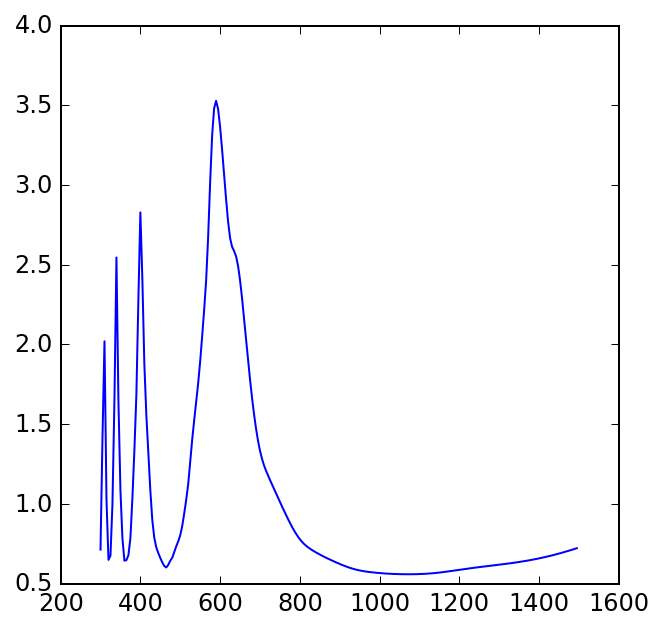

In [21]:
Rnm = 500

def CextAu(wl0nm):
    Rnms = [Rnm]
    k0nm = (2*pi/wl0nm)
    ns = [ri.nAu(wl0nm), 1.33]
    return mie.CExtAbsSca(10, ns, Rnms, k0nm)[0]
    
def CextZnO(wl0nm):
    Rnms = [Rnm]
    k0nm = (2*pi/wl0nm)
    ns = [ri.nZnO(wl0nm), 1.33]
    return mie.CExtAbsSca(10, ns, Rnms, k0nm)[0]
    
wlListnm = np.arange(300,1500,5)
C1 = np.asarray(list(map(CextAu, wlListnm)))
C2 = np.asarray(list(map(CextZnO, wlListnm)))

pylab.plot(wlListnm, C1/C2)
pylab.show()

# The CDA in 2D with normal incidence

The CDA computation returns a lattice sum dipole response matrix $\pmb{\mathcal{S}}$ that relates the incident light field $\mathbf{E}_{\mathrm{inc}}$ to the response/scattered field $\mathbf{E}_{\mathrm{sca}}$: 
$$\mathbf{E}_{\mathrm{resp}} = \pmb{\mathcal{S}} \mathbf{E}_{\mathrm{inc}}.$$ 
It is a symmetric matrix, e.g., $\mathcal{S}_{xy} = \mathcal{S}_{yx}$.

The lattice sum matrix $\pmb{\mathcal{S}}$ is then combined with the single-nanoparticle dipole polarizability $\alpha_1$ to determine the coupled lattice effective polarizability $\alpha_{\mathrm{CDA}}$. These can also be expressed as inverse polarizability matrices $\pmb{\mathcal{\alpha}}_{1}^{-1} = \alpha_1^{-1} \pmb{\mathcal{I}}$ ($\pmb{\mathcal{I}}$ is the identity matrix) and $\pmb{\mathcal{\alpha}}_{\mathrm{CDA}}^{-1} = \pmb{\mathcal{\alpha}}_{1}^{-1} - \pmb{\mathcal{S}}$ which satisfy similar relationships between the incident and response fields:
$$\mathbf{E}_{\mathrm{resp}} = \pmb{\mathcal{\alpha}}_{\mathrm{CDA}}^{-1} \mathbf{E}_{\mathrm{inc}}.$$ 

For identical spherical nanoparticles, the single nanoparticle polarizability is isotropic, i.e., the same in all three directions. For normal incidence on a 2D regular, semi-infinite lattice, the lattice sum matrix is diagonal, and $\mathcal{S}_{xx} = \mathcal{S}_{yy}$. Then the effective polarizability is a scalar, 
$$ \alpha_{\mathrm{CDA}}^{-1} = \alpha_1^{-1} - \mathcal{S}_{xx}. $$

The extinction cross section is 
$$ C_{\mathrm{ext}} = 4\pi k \;\mathrm{Im}\left( \frac{ \mathbf{E}_{\mathrm{inc}}^{\dagger} \cdot \mathbf{E}_{\mathrm{resp}} }{ \mathbf{E}_{\mathrm{inc}}^{\dagger} \cdot \mathbf{E}_{\mathrm{inc}} } \right). $$ 
For identical spherical particles in a 2D lattice with normal incidence, the response field is directly proportional to the incident field, so this expression simplifies significantly: 
$$ C_{\mathrm{ext}} = 4\pi k \;\mathrm{Im}\left( \alpha_1^{-1} - \mathcal{S}_{xx} \right). $$ 

## Single layer

### General formula with position vectors

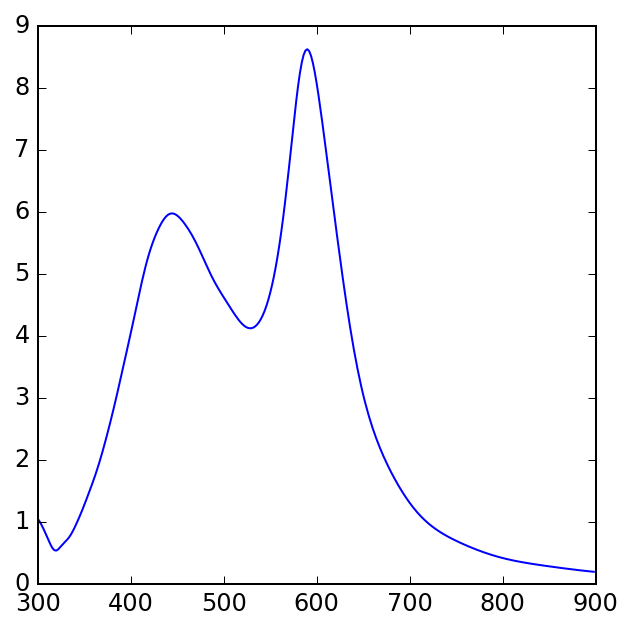

In [12]:
log2alpha = -0.5
dccnm = 430
coreRnm = 48
Rnms = [coreRnm]

RvecList, RmagList = lattices.RvecRmagListsHex(10)
RvecListnm = [i*dccnm for i in RvecList]

def CextCDA(wl0nm): 
    ns = [ri.nAg(wl0nm), 1.48]
    nmed = ns[-1]
    k0nm = (2*pi/wl0nm)
    knm = nmed*k0nm
    kinm = (2**log2alpha)/(2*dccnm)
    kLatticeSumnm = knm + 1j*kinm

    SMatnm3 = cda.latticeSumSMat(RvecListnm, kLatticeSumnm)
    Einc = np.array([1,0,0]) # x-polarized light
    Snm3 = Einc.dot(SMatnm3.dot(Einc))
    alpha1nm3 = mie.alpha(ns, Rnms, k0nm)
    
    return cda.CextCDA(Snm3, alpha1nm3, knm)/(pi*coreRnm**2)

wlListnm = np.arange(300,900,2)
CextListnm = list(map(CextCDA, wlListnm))
pylab.plot(wlListnm, CextListnm)

### Simplified geometry formula

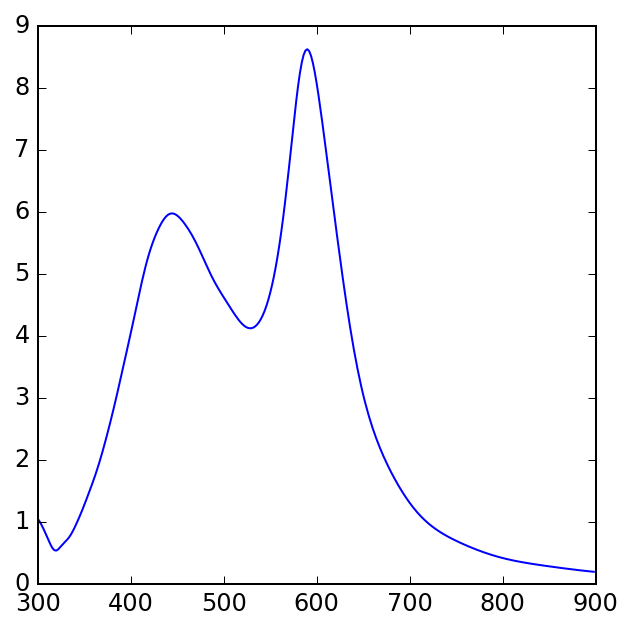

In [5]:
log2alpha = -0.5
dccnm = 430
coreRnm = 48
Rnms = [coreRnm]

RmagList, NList = lattices.RmagNListHex(10)
RmagListnm = [i*dccnm for i in RmagList]

def CextCDA(wl0nm): 
    ns = [ri.nAg(wl0nm), 1.48]
    nmed = ns[-1]
    k0nm = (2*pi/wl0nm)
    knm = nmed*k0nm
    kinm = (2**log2alpha)/(2*dccnm)
    kLatticeSumnm = knm + 1j*kinm

    Snm3 = cda.latticeSumS0(RmagListnm, NList, kLatticeSumnm)
    alpha1nm3 = mie.alpha(ns, Rnms, k0nm)
    
    return cda.CextCDA(Snm3, alpha1nm3, knm)/(pi*coreRnm**2)

wlListnm = np.arange(300,900,2)
CextListnm = list(map(CextCDA, wlListnm))
pylab.plot(wlListnm, CextListnm)

## Bi-layer

### General formula, but without z-dependent phase

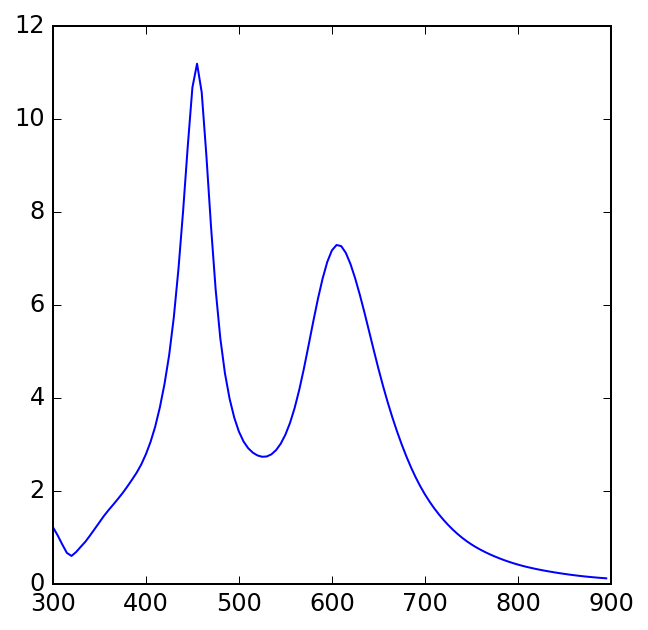

In [18]:
log2alpha = -0.5
dccnm = 430
coreRnm = 48
thicknessnm = 150

dz = 2*thicknessnm/dccnm
RvecList, RmagList = lattices.RvecRmagListsHex(15)
RvecList2 = [(Rvec + [0,0,dz]) for Rvec in RvecList]
RvecListnm = [Rvec*dccnm for Rvec in RvecList] 
RvecList2nm = [Rvec*dccnm for Rvec in RvecList2] 

def CextCDA(wl0nm): 
    Rnms = [coreRnm]
    ns = [ri.nAg(wl0nm), 1.48]
    nmed = ns[-1]
    k0nm = (2*pi/wl0nm)
    knm = nmed*k0nm
    kinm = (2**log2alpha)/(2*dccnm)
    kLatticeSumnm = knm + 1j*kinm

    SMatnm3 = cda.latticeSumSMat(RvecListnm, kLatticeSumnm)
    SMat2nm3 = cda.latticeSumSMat(RvecList2nm, kLatticeSumnm)
    SMatnm3 = SMatnm3 + SMat2nm3
    Einc = np.array([1,0,0]) # x-polarized light
    Snm3 = Einc.dot(SMatnm3.dot(Einc))
    alpha1nm3 = mie.alpha(ns, Rnms, k0nm)
    
    return cda.CextCDA(Snm3, alpha1nm3, knm)/(pi*coreRnm**2)

wlListnm = np.arange(300,900,5)
CextListnm = list(map(CextCDA, wlListnm))
pylab.plot(wlListnm, CextListnm)

### Simplified formula without z-coupling

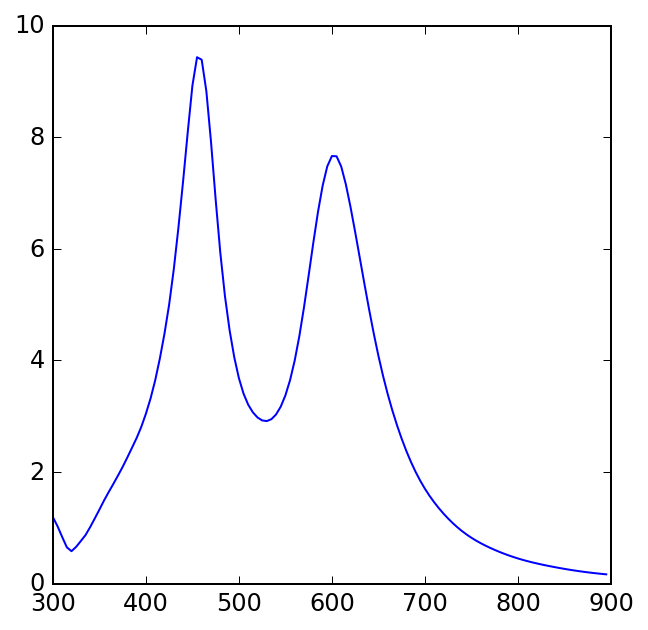

In [16]:
log2alpha = -0.5
dccnm = 430
coreRnm = 48
thicknessnm = 150

dz = 2*thicknessnm/dccnm
RmagList0, NList0 = lattices.RmagNListHex(15)
RmagList2 = [abs(sqrt(R**2 + dz**2)) for R in RmagList0]
RmagList = RmagList0 + RmagList2
NList = NList0 + NList0
RmagListnm = [i*dccnm for i in RmagList]

def CextCDA(wl0nm): 
    Rnms = [coreRnm]
    ns = [ri.nAg(wl0nm), 1.48]
    nmed = ns[-1]
    k0nm = (2*pi/wl0nm)
    knm = nmed*k0nm
    kinm = (2**log2alpha)/(2*dccnm)
    kLatticeSumnm = knm + 1j*kinm

    Snm3 = cda.latticeSumS0(RmagListnm, NList, kLatticeSumnm)
    alpha1nm3 = mie.alpha(ns, Rnms, k0nm)
    
    return cda.CextCDA(Snm3, alpha1nm3, knm)/(pi*coreRnm**2)

wlListnm = np.arange(300,900,5)
CextListnm = list(map(CextCDA, wlListnm))
pylab.plot(wlListnm, CextListnm)